In [1]:
from tensorflow.keras.datasets import mnist

## Data preparation

In [2]:
# load and split data(train-test split)
(train_image,train_labels),(test_image, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)
4


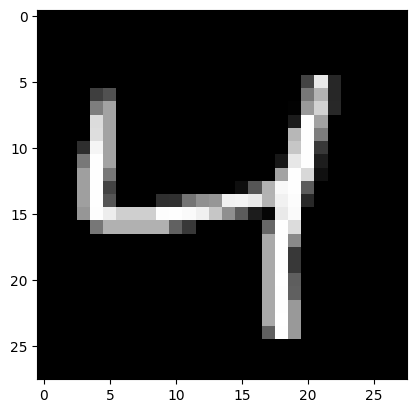

In [3]:
# Inspect data

import matplotlib.pyplot as plt


print(type(train_image))

print((train_image.shape))

print(test_image.shape)



#print(train_image[2])

# data visualization

plt.imshow(train_image[2], cmap = 'gray')
print(train_labels[2])

## Data Preprocessing

In [4]:
# convert 2D image to 1D vector(39 min video2 jalase2 jahad)
train_image = train_image.reshape((60000, 28 * 28))
test_image = test_image.reshape((10000, 28 * 28))
# normalize image values(picxel miarim bein 0,1)(x-min/(max-min))
train_image = train_image.astype("float32") / 255
test_image = test_image.astype("float32") / 255

## model design !!

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                           layers.Dense(512, activation="relu"),
                           layers.Dense(10, activation="softmax")
                         ])

## Training model !!!

In [6]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_image, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2693 - accuracy: 0.9225
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1087 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0712 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0521 - accuracy: 0.9839
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0381 - accuracy: 0.9889


## Evalutaion !!

10
1/1 [==============================] - 0s 144ms/step


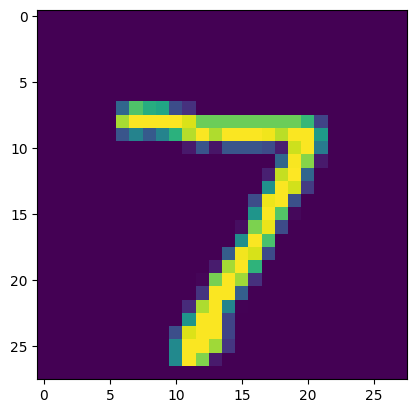

In [7]:
test_digits = test_image[0:10]
print(len(test_digits))
predictions = model.predict(test_digits)
predictions[0]

plt.imshow(test_digits[0].reshape(28,28))

In [8]:
predictions[0].argmax()

7

In [9]:
test_loss, test_acc = model.evaluate(test_image, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9812
test_acc: 0.9811999797821045
test_loss: 0.06310027092695236
